In [ ]:
!pip install speechbrain
!pip install transformers

In [162]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import shutil
from speechbrain.pretrained.interfaces import foreign_class
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#### Copy test wav files

In [ ]:
df = pd.read_csv("./data/pre-processed/s2e/audio_test.csv")
df = df[["wav_file", "label"]].sort_values("wav_file")
df["session"] = df["wav_file"].apply(lambda x: "Session" + x[4])
df["folder"] = df["wav_file"].apply(lambda x: x[:-5])

In [ ]:
source_folder = "./data/IEMOCAP_full_release"
destination_folder = "./data/test_data"

In [ ]:
for i, row in df.iterrows():
    src_path = f"{source_folder}\\{row['session']}\\sentences\\wav\\{row['folder']}\\{row['wav_file']}.wav"
    dst_path = f"{destination_folder}\\{row['session']}\\{row['wav_file']}.wav"
    shutil.copy(src_path, dst_path)

#### emotion-recognition-wav2vec2

In [4]:
classifier = foreign_class(
    source="speechbrain/emotion-recognition-wav2vec2-IEMOCAP",
    pymodule_file="custom_interface.py",
    classname="CustomEncoderWav2vec2Classifier")

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:380: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of the model checkpoint at facebook/wav2vec2-base were not used when initializing Wav2Vec2Model: ['project_hid.bias', 'project_q.bias', 'quantizer.codevectors', 'project_q.weight', 'project_hid.weight', 'quantizer.weight_proj.bias', 'quantizer.weight_proj.weight']
- This IS expected if you are initializing Wav2Vec2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2Model from the checkpoint of a model that you expect

In [5]:
out_prob, score, index, text_lab = classifier.classify_file("./test_data/Session1/Ses01F_impro02_F006.wav")
print(text_lab[0])
print(score)
print(index)
print(out_prob)
print(out_prob.tolist()[0])

neu
tensor([1.])
tensor([0])
tensor([[1.0000e+00, 1.2230e-11, 8.4378e-12, 3.1927e-10]])
[1.0, 1.2230473578345169e-11, 8.43780687681539e-12, 3.1926677968030504e-10]


In [6]:
test_data_path = "./test_data"

In [8]:
wav_files = []
pred_probas = []
pred_labels = []
for i in range(1, 5):
  session_data_path = f"{test_data_path}/Session{i}"
  for wav_file in os.listdir(session_data_path):
    print(wav_file)
    out_prob, score, index, text_lab = classifier.classify_file(
        f"{session_data_path}/{wav_file}")
    wav_files.append(wav_file.split(".")[0])
    pred_probas.append(out_prob.tolist()[0])
    pred_labels.append(text_lab[0])

Ses01M_impro06_F000.wav
Ses01F_impro07_M017.wav
Ses01F_script01_2_M001.wav
Ses01F_impro06_F021.wav
Ses01F_script01_2_M011.wav
Ses01F_script01_1_F030.wav
Ses01F_script01_3_M028.wav
Ses01M_script02_2_F015.wav
Ses01M_impro03_F022.wav
Ses01F_impro03_M017.wav
Ses01F_impro03_F006.wav
Ses01M_script02_1_M042.wav
Ses01F_impro05_M033.wav
Ses01M_script01_3_M022.wav
Ses01M_impro05_M027.wav
Ses01F_script02_1_F003.wav
Ses01F_script03_2_F034.wav
Ses01F_impro05_F008.wav
Ses01F_script01_3_M008.wav
Ses01M_script03_2_F023.wav
Ses01M_script03_1_M012.wav
Ses01F_script02_2_M021.wav
Ses01M_script03_1_M019.wav
Ses01F_script01_1_F040.wav
Ses01F_script01_1_M039.wav
Ses01M_script01_1_M031.wav
Ses01M_script02_2_M031.wav
Ses01M_script01_1_F010.wav
Ses01F_script02_2_M002.wav
Ses01F_impro04_F030.wav
Ses01F_impro05_M026.wav
Ses01F_script02_2_M004.wav
Ses01M_impro06_F019.wav
Ses01M_script03_1_F008.wav
Ses01F_script02_2_M035.wav
Ses01M_script01_3_M025.wav
Ses01M_script02_1_F014.wav
Ses01F_impro03_F009.wav
Ses01F_impro0

In [13]:
for i in range(5, 6):
  session_data_path = f"{test_data_path}/Session{i}"
  for wav_file in os.listdir(session_data_path):
    print(wav_file)
    out_prob, score, index, text_lab = classifier.classify_file(
        f"{session_data_path}/{wav_file}")
    wav_files.append(wav_file.split(".")[0])
    pred_probas.append(out_prob.tolist()[0])
    pred_labels.append(text_lab[0])

Ses05F_script01_1_F038.wav
Ses05F_impro01_F019.wav
Ses05F_impro07_F013.wav
Ses05F_impro04_M036.wav
Ses05F_impro08_F004.wav
Ses05F_impro05_M018.wav
Ses05F_script01_3_M026.wav
Ses05M_script02_2_M033.wav
Ses05M_impro07_M003.wav
Ses05F_impro05_M034.wav
Ses05F_script01_3_M025.wav
Ses05M_impro08_M008.wav
Ses05F_impro04_M020.wav
Ses05M_impro07_M047.wav
Ses05M_script03_1_M027.wav
Ses05M_impro05_F012.wav
Ses05F_impro05_F028.wav
Ses05M_script01_1b_F037.wav
Ses05M_script01_2_F014.wav
Ses05F_impro06_M017.wav
Ses05F_script01_3_F015.wav
Ses05F_impro06_F015.wav
Ses05F_impro01_M013.wav
Ses05F_impro07_F007.wav
Ses05F_script01_1_F034.wav
Ses05F_impro07_M014.wav
Ses05F_impro02_F012.wav
Ses05F_impro08_F002.wav
Ses05F_impro07_M035.wav
Ses05M_script03_1_M007.wav
Ses05M_script01_1b_M029.wav
Ses05F_script03_1_M006.wav
Ses05F_impro03_F029.wav
Ses05F_impro04_F029.wav
Ses05F_script01_3_M010.wav
Ses05M_impro07_M020.wav
Ses05M_impro02_F003.wav
Ses05F_script01_1_M019.wav
Ses05M_impro02_M028.wav
Ses05M_impro05_F003.

In [15]:
with open("./data/wav2vec2_results/wav2vec2_pred_probas.pkl", "wb") as pkl:
  pickle.dump(pred_probas, pkl)
with open("./data/wav2vec2_results/wav2vec2_pred_labels.pkl", "wb") as pkl:
  pickle.dump(pred_labels, pkl)
with open("./data/wav2vec2_results/wav2vec2_wav_files.pkl", "wb") as pkl:
  pickle.dump(wav_files, pkl)

In [17]:
results_dict = {
    "wav_file": wav_files,
    "pred_label": pred_labels,
    "pred_probas": pred_probas
}
results_df = pd.DataFrame(results_dict)
results_df.to_csv("./data/wav2vec2_results/results.csv")

In [175]:
results_df = pd.read_csv("./data/wav2vec2_results/results.csv", index_col=0)
test_df = pd.read_csv("./data/s2e/audio_test.csv")[["wav_file", "label"]]

In [176]:
results_df.head()

,wav_file,pred_label,pred_probas
0,Ses01M_impro06_F000,neu,"[1.0, 5.599176938070327e-12, 4.805171538446728..."
1,Ses01F_impro07_M017,hap,"[3.915827384570747e-11, 1.073748381874573e-11,..."
2,Ses01F_script01_2_M001,neu,"[1.0, 1.0466083295163076e-12, 1.04124722732912..."
3,Ses01F_impro06_F021,sad,"[4.463321658931818e-07, 1.1462553996255398e-12..."
4,Ses01F_script01_2_M011,neu,"[1.0, 5.6150049887460085e-12, 3.08105901902777..."


In [177]:
emotion_dict = {'ang': 0,
                'hap': 1,
                'exc': 1,
                'sad': 2,
                'fru': 2,
                'fea': 3,
                'sur': 4,
                'neu': 5
               }

In [178]:
results_df["pred_label_code"] = results_df["pred_label"].apply(lambda x: emotion_dict[x])
results_df["pred_probas"] = results_df["pred_probas"].str.strip("][").str.split(", ")
results_df["pred_probas"] = results_df["pred_probas"].apply(lambda x: [float(prob) for prob in x])
test_df = test_df[test_df["label"].isin([0, 1, 2, 5])]
# test_df["label_4cat"] = test_df["label"].map({0: 0, 1: 1, 2: 2, 3: 2, 4: 1, 5: 5})
test_df["label_4cat"] = test_df["label"].map({0: 1, 1: 2, 2: 3, 5: 0})

In [179]:
test_df["label"].unique()

array([0, 2, 5, 1], dtype=int64)

In [180]:
test_df["label_4cat"].unique()

array([1, 3, 0, 2], dtype=int64)

In [181]:
results_df["pred_label_code"].unique()

array([5, 1, 2, 0], dtype=int64)

In [182]:
wa2vec2_pred_df = test_df.merge(results_df, how="left", on="wav_file")
wa2vec2_pred_df.head()

,wav_file,label,label_4cat,pred_label,pred_probas,pred_label_code
0,Ses02F_impro05_F006,0,1,ang,"[4.116755547567408e-12, 1.0, 2.865096126927063...",0
1,Ses04M_impro01_M016,2,3,ang,"[8.072909528367145e-12, 1.0, 2.802711404972791...",0
2,Ses01M_script01_1_F025,5,0,ang,"[8.795210219847416e-12, 1.0, 2.388340718771642...",0
3,Ses04F_impro01_F007,2,3,ang,"[4.91812580244444e-12, 1.0, 2.7268839313324134...",0
4,Ses03M_impro05b_M001,2,3,neu,"[1.0, 2.377371736972389e-11, 2.093069858058460...",5


In [188]:
emo_keys = list(['ang', 'hap', 'sad', 'neu'])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def one_hot_encoder(true_labels, num_records, num_classes):
    temp = np.array(true_labels[:num_records])
    true_labels = np.zeros((num_records, num_classes))
    true_labels[np.arange(num_records), temp] = 1
    return true_labels

def display_results(y_test, pred_probs, cm=True):
    pred = np.argmax(pred_probs, axis=-1)
    one_hot_true = one_hot_encoder(y_test, len(pred), len(emotion_dict))
    print('Test Set Accuracy =  {0:.3f}'.format(accuracy_score(y_test, pred)))
    print('Test Set F-score =  {0:.3f}'.format(f1_score(y_test, pred, average='macro')))
    print('Test Set Precision =  {0:.3f}'.format(precision_score(y_test, pred, average='macro')))
    print('Test Set Recall =  {0:.3f}'.format(recall_score(y_test, pred, average='macro')))
    print(classification_report(y_test, pred, target_names=emo_keys))
    if cm:
        plot_confusion_matrix(confusion_matrix(y_test, pred), classes=emo_keys)

Test Set Accuracy =  0.738
Test Set F-score =  0.744
Test Set Precision =  0.764
Test Set Recall =  0.811
              precision    recall  f1-score   support

         ang       0.66      0.96      0.78       402
         hap       0.57      0.97      0.72       241
         sad       0.89      0.91      0.90       360
         neu       0.93      0.42      0.57       633

    accuracy                           0.74      1636
   macro avg       0.76      0.81      0.74      1636
weighted avg       0.80      0.74      0.72      1636

Confusion matrix, without normalization
[[384   5   1  12]
 [  6 233   2   0]
 [ 19   6 327   8]
 [169 165  36 263]]


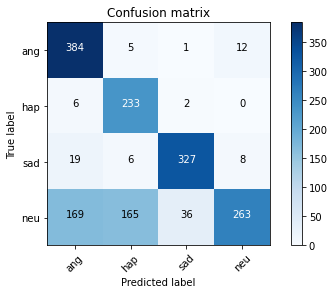

In [192]:
pred_probas = np.array(wa2vec2_pred_df["pred_probas"].tolist())
with open('pred_probas/wav2vec2_classifier.pkl', 'wb') as f:
    pickle.dump(pred_probas, f)
display_results(wa2vec2_pred_df["label_4cat"], pred_probas)